In [ ]:
! mkdir train

mkdir: cannot create directory ‘train’: File exists


In [ ]:
! unzip archive.zip -d train

Archive:  archive.zip
  inflating: train/brain_tumor_dataset/no/1 no.jpeg  
  inflating: train/brain_tumor_dataset/no/10 no.jpg  
  inflating: train/brain_tumor_dataset/no/11 no.jpg  
  inflating: train/brain_tumor_dataset/no/12 no.jpg  
  inflating: train/brain_tumor_dataset/no/13 no.jpg  
  inflating: train/brain_tumor_dataset/no/14 no.jpg  
  inflating: train/brain_tumor_dataset/no/15 no.jpg  
  inflating: train/brain_tumor_dataset/no/17 no.jpg  
  inflating: train/brain_tumor_dataset/no/18 no.jpg  
  inflating: train/brain_tumor_dataset/no/19 no.jpg  
  inflating: train/brain_tumor_dataset/no/2 no.jpeg  
  inflating: train/brain_tumor_dataset/no/20 no.jpg  
  inflating: train/brain_tumor_dataset/no/21 no.jpg  
  inflating: train/brain_tumor_dataset/no/22 no.jpg  
  inflating: train/brain_tumor_dataset/no/23 no.jpg  
  inflating: train/brain_tumor_dataset/no/24 no.jpg  
  inflating: train/brain_tumor_dataset/no/25 no.jpg  
  inflating: train/brain_tumor_dataset/no/26 no.jpg  
  infl

In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from matplotlib import pyplot

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/train/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(0)

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/train/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(1)

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
def dense_to_one_hot(labels_dense, num_classes=10):
  """Convert class labels from scalars to one-hot vectors."""
  num_labels = labels_dense.shape[0]
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot

In [ ]:
result = np.array(result)
result = dense_to_one_hot(result, num_classes=2)

In [ ]:
rgb_weights = np.array([0.2989, 0.5870, 0.1140])
data = np.array([np.dot(x[...,:3], rgb_weights) for x in data])
data = data.reshape(data.shape[0],data.shape[1],data.shape[2],1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

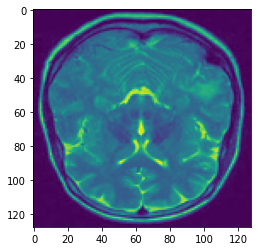

In [ ]:
pyplot.imshow(np.squeeze(x_train[0]))

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

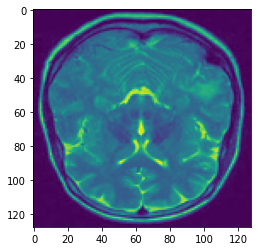

In [ ]:
pyplot.imshow(np.squeeze(x_train[0]))

Building of Neural Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import cv2

config=tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session=tf.compat.v1.InteractiveSession(config=config)


def init():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 1), padding = 'Same'))
    model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


    model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
    model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

    model.add(tf.keras.layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


def train(models):
    losses = []
    for i in range(len(models)):
        history = models[i].fit(x_train, y_train, epochs = 30, batch_size = 40,validation_data = (x_test, y_test))
        pyplot.plot(history.history['accuracy'])
        pyplot.plot(history.history['loss'])
        pyplot.title('model accuracy')
        pyplot.ylabel('accuracy')
        pyplot.xlabel('epoch')
        pyplot.legend(['train', 'val'], loc='upper left')
        pyplot.show()
        losses.append(round(history.history['loss'][-1], 4))
    return models, losses


/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Perform the Genetic Algorithm on the model

Epoch 1/30
3/3 [==============================] - 1s 169ms/step - loss: 36.6411 - accuracy: 0.5668 - val_loss: 0.7012 - val_accuracy: 0.6071
Epoch 2/30
3/3 [==============================] - 0s 77ms/step - loss: 42.1851 - accuracy: 0.5678 - val_loss: 1.2227 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 68ms/step - loss: 10.3332 - accuracy: 0.7107 - val_loss: 1.8510 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 72ms/step - loss: 16.8203 - accuracy: 0.6871 - val_loss: 0.9666 - val_accuracy: 0.6071
Epoch 5/30
3/3 [==============================] - 0s 70ms/step - loss: 3.1392 - accuracy: 0.8345 - val_loss: 0.5017 - val_accuracy: 0.8214
Epoch 6/30
3/3 [==============================] - 0s 69ms/step - loss: 8.7135 - accuracy: 0.6951 - val_loss: 0.5997 - val_accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 0s 71ms/step - loss: 1.7817 - accuracy: 0.8453 - val_loss: 1.0604 - val_accuracy: 0.6786
Epoch 8/30
3/3 [======

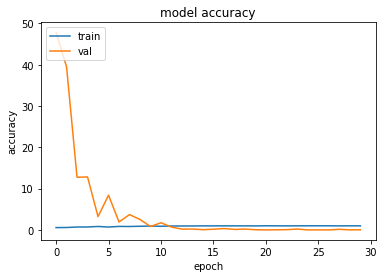

Epoch 1/30
3/3 [==============================] - 1s 150ms/step - loss: 64.8519 - accuracy: 0.5345 - val_loss: 1.4038 - val_accuracy: 0.5357
Epoch 2/30
3/3 [==============================] - 0s 71ms/step - loss: 32.1361 - accuracy: 0.6098 - val_loss: 0.8445 - val_accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 0s 69ms/step - loss: 12.2689 - accuracy: 0.7211 - val_loss: 1.0521 - val_accuracy: 0.5357
Epoch 4/30
3/3 [==============================] - 0s 72ms/step - loss: 16.3978 - accuracy: 0.6431 - val_loss: 0.6476 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 0s 70ms/step - loss: 9.6132 - accuracy: 0.7170 - val_loss: 0.7382 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 0s 70ms/step - loss: 5.5562 - accuracy: 0.7492 - val_loss: 1.5295 - val_accuracy: 0.7143
Epoch 7/30
3/3 [==============================] - 0s 69ms/step - loss: 4.2854 - accuracy: 0.7776 - val_loss: 2.9367 - val_accuracy: 0.6071
Epoch 8/30
3/3 [======

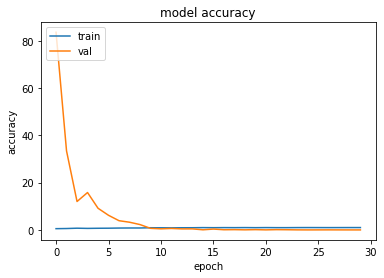

Epoch 1/30
3/3 [==============================] - 1s 157ms/step - loss: 17.9590 - accuracy: 0.5772 - val_loss: 1.2022 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 73ms/step - loss: 19.3731 - accuracy: 0.6174 - val_loss: 0.7191 - val_accuracy: 0.5714
Epoch 3/30
3/3 [==============================] - 0s 73ms/step - loss: 10.0451 - accuracy: 0.7704 - val_loss: 0.7833 - val_accuracy: 0.5714
Epoch 4/30
3/3 [==============================] - 0s 76ms/step - loss: 12.9153 - accuracy: 0.7499 - val_loss: 0.6459 - val_accuracy: 0.7143
Epoch 5/30
3/3 [==============================] - 0s 73ms/step - loss: 5.7064 - accuracy: 0.7846 - val_loss: 0.6346 - val_accuracy: 0.7500
Epoch 6/30
3/3 [==============================] - 0s 72ms/step - loss: 4.9473 - accuracy: 0.8619 - val_loss: 0.7204 - val_accuracy: 0.6786
Epoch 7/30
3/3 [==============================] - 0s 71ms/step - loss: 1.1295 - accuracy: 0.9376 - val_loss: 0.8142 - val_accuracy: 0.7143
Epoch 8/30
3/3 [======

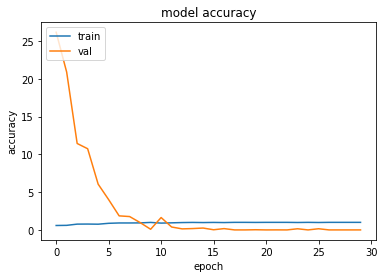

Epoch 1/30
3/3 [==============================] - 1s 155ms/step - loss: 27.5646 - accuracy: 0.4505 - val_loss: 0.7163 - val_accuracy: 0.7857
Epoch 2/30
3/3 [==============================] - 0s 74ms/step - loss: 25.0431 - accuracy: 0.6368 - val_loss: 1.5375 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 71ms/step - loss: 14.4054 - accuracy: 0.6625 - val_loss: 0.8898 - val_accuracy: 0.5357
Epoch 4/30
3/3 [==============================] - 0s 69ms/step - loss: 3.7032 - accuracy: 0.8061 - val_loss: 0.7728 - val_accuracy: 0.5357
Epoch 5/30
3/3 [==============================] - 0s 74ms/step - loss: 3.6594 - accuracy: 0.8252 - val_loss: 0.8985 - val_accuracy: 0.6429
Epoch 6/30
3/3 [==============================] - 0s 73ms/step - loss: 3.4618 - accuracy: 0.8404 - val_loss: 0.8671 - val_accuracy: 0.7857
Epoch 7/30
3/3 [==============================] - 0s 73ms/step - loss: 2.7458 - accuracy: 0.8932 - val_loss: 0.8245 - val_accuracy: 0.7143
Epoch 8/30
3/3 [=======

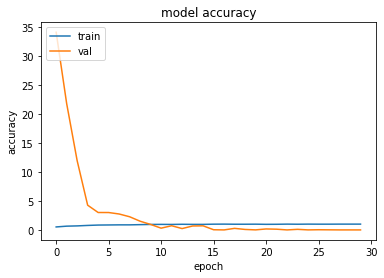

Epoch 1/30
3/3 [==============================] - 1s 154ms/step - loss: 72.2676 - accuracy: 0.5713 - val_loss: 2.5700 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 74ms/step - loss: 23.7759 - accuracy: 0.6362 - val_loss: 0.6442 - val_accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 0s 74ms/step - loss: 14.2846 - accuracy: 0.6867 - val_loss: 1.0911 - val_accuracy: 0.5357
Epoch 4/30
3/3 [==============================] - 0s 74ms/step - loss: 11.1150 - accuracy: 0.6833 - val_loss: 0.6989 - val_accuracy: 0.6786
Epoch 5/30
3/3 [==============================] - 0s 71ms/step - loss: 4.4275 - accuracy: 0.7659 - val_loss: 0.5900 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 0s 70ms/step - loss: 5.1612 - accuracy: 0.7645 - val_loss: 1.8676 - val_accuracy: 0.6429
Epoch 7/30
3/3 [==============================] - 0s 72ms/step - loss: 1.5761 - accuracy: 0.8373 - val_loss: 4.0483 - val_accuracy: 0.6429
Epoch 8/30
3/3 [======

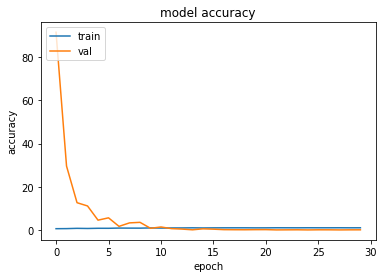

Epoch 1/30
3/3 [==============================] - 1s 154ms/step - loss: 63.4429 - accuracy: 0.5171 - val_loss: 0.6894 - val_accuracy: 0.6071
Epoch 2/30
3/3 [==============================] - 0s 72ms/step - loss: 26.2447 - accuracy: 0.5785 - val_loss: 0.5714 - val_accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 0s 80ms/step - loss: 11.3608 - accuracy: 0.6934 - val_loss: 0.5821 - val_accuracy: 0.7500
Epoch 4/30
3/3 [==============================] - 0s 74ms/step - loss: 8.4032 - accuracy: 0.7239 - val_loss: 0.7084 - val_accuracy: 0.7500
Epoch 5/30
3/3 [==============================] - 0s 72ms/step - loss: 2.5206 - accuracy: 0.8273 - val_loss: 0.9057 - val_accuracy: 0.6786
Epoch 6/30
3/3 [==============================] - 0s 70ms/step - loss: 5.2066 - accuracy: 0.7409 - val_loss: 1.3006 - val_accuracy: 0.5714
Epoch 7/30
3/3 [==============================] - 0s 74ms/step - loss: 1.1789 - accuracy: 0.8807 - val_loss: 1.8403 - val_accuracy: 0.5357
Epoch 8/30
3/3 [=======

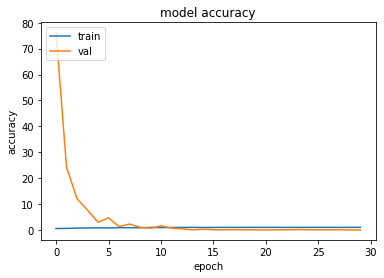

Epoch 1/30
3/3 [==============================] - 1s 154ms/step - loss: 47.8908 - accuracy: 0.4377 - val_loss: 1.9209 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 71ms/step - loss: 39.7148 - accuracy: 0.5619 - val_loss: 1.1648 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 71ms/step - loss: 6.8025 - accuracy: 0.7412 - val_loss: 0.6016 - val_accuracy: 0.7143
Epoch 4/30
3/3 [==============================] - 0s 73ms/step - loss: 11.6458 - accuracy: 0.6625 - val_loss: 0.7179 - val_accuracy: 0.6071
Epoch 5/30
3/3 [==============================] - 0s 74ms/step - loss: 3.6192 - accuracy: 0.7839 - val_loss: 0.9271 - val_accuracy: 0.5714
Epoch 6/30
3/3 [==============================] - 0s 73ms/step - loss: 4.0805 - accuracy: 0.7947 - val_loss: 0.9829 - val_accuracy: 0.5714
Epoch 7/30
3/3 [==============================] - 0s 76ms/step - loss: 1.6975 - accuracy: 0.8731 - val_loss: 0.8585 - val_accuracy: 0.6786
Epoch 8/30
3/3 [=======

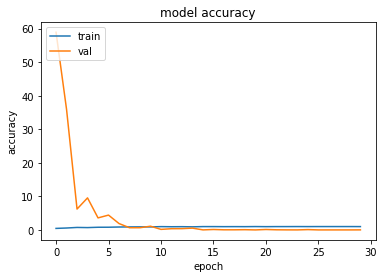

Epoch 1/30
3/3 [==============================] - 1s 155ms/step - loss: 18.4817 - accuracy: 0.5390 - val_loss: 1.3285 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 71ms/step - loss: 37.6068 - accuracy: 0.6320 - val_loss: 0.7040 - val_accuracy: 0.6429
Epoch 3/30
3/3 [==============================] - 0s 73ms/step - loss: 20.9876 - accuracy: 0.6427 - val_loss: 1.0939 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 72ms/step - loss: 10.9365 - accuracy: 0.7638 - val_loss: 1.1294 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 74ms/step - loss: 9.5518 - accuracy: 0.7700 - val_loss: 0.9233 - val_accuracy: 0.6071
Epoch 6/30
3/3 [==============================] - 0s 71ms/step - loss: 3.3588 - accuracy: 0.8363 - val_loss: 0.9767 - val_accuracy: 0.6071
Epoch 7/30
3/3 [==============================] - 0s 72ms/step - loss: 2.8055 - accuracy: 0.8533 - val_loss: 1.1365 - val_accuracy: 0.6429
Epoch 8/30
3/3 [======

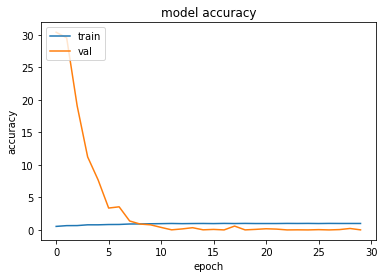

Epoch 1/30
3/3 [==============================] - 1s 156ms/step - loss: 31.1508 - accuracy: 0.5408 - val_loss: 0.6895 - val_accuracy: 0.5357
Epoch 2/30
3/3 [==============================] - 0s 75ms/step - loss: 11.9204 - accuracy: 0.7274 - val_loss: 0.9779 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 73ms/step - loss: 7.8705 - accuracy: 0.8210 - val_loss: 0.7060 - val_accuracy: 0.5714
Epoch 4/30
3/3 [==============================] - 0s 75ms/step - loss: 7.7079 - accuracy: 0.7606 - val_loss: 0.6855 - val_accuracy: 0.7143
Epoch 5/30
3/3 [==============================] - 0s 74ms/step - loss: 3.1282 - accuracy: 0.8914 - val_loss: 0.6577 - val_accuracy: 0.7143
Epoch 6/30
3/3 [==============================] - 0s 70ms/step - loss: 5.2761 - accuracy: 0.8078 - val_loss: 0.6214 - val_accuracy: 0.6786
Epoch 7/30
3/3 [==============================] - 0s 72ms/step - loss: 3.1153 - accuracy: 0.9018 - val_loss: 0.6706 - val_accuracy: 0.6429
Epoch 8/30
3/3 [========

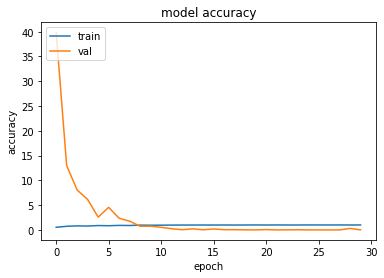

Epoch 1/30
3/3 [==============================] - 1s 157ms/step - loss: 63.3189 - accuracy: 0.5748 - val_loss: 1.0078 - val_accuracy: 0.6429
Epoch 2/30
3/3 [==============================] - 0s 71ms/step - loss: 18.4874 - accuracy: 0.6865 - val_loss: 0.6490 - val_accuracy: 0.7143
Epoch 3/30
3/3 [==============================] - 0s 74ms/step - loss: 11.5700 - accuracy: 0.6830 - val_loss: 0.8371 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 0s 72ms/step - loss: 8.4365 - accuracy: 0.7201 - val_loss: 0.6728 - val_accuracy: 0.7143
Epoch 5/30
3/3 [==============================] - 0s 77ms/step - loss: 5.2683 - accuracy: 0.7628 - val_loss: 1.0654 - val_accuracy: 0.6786
Epoch 6/30
3/3 [==============================] - 0s 73ms/step - loss: 4.3183 - accuracy: 0.7329 - val_loss: 1.9639 - val_accuracy: 0.6786
Epoch 7/30
3/3 [==============================] - 0s 71ms/step - loss: 2.2648 - accuracy: 0.7970 - val_loss: 3.4419 - val_accuracy: 0.6071
Epoch 8/30
3/3 [=======

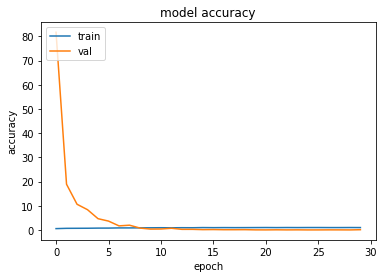

[0.0252, 0.0046, 0.0008, 0.0003, 0.0459, 0.0011, 0.0124, 0.0091, 0.0058, 0.0997]
Epoch 1/30
3/3 [==============================] - 0s 102ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 31.0613 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 73ms/step - loss: 0.0969 - accuracy: 0.9910 - val_loss: 32.1956 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 74ms/step - loss: 0.0828 - accuracy: 0.9820 - val_loss: 33.3465 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 76ms/step - loss: 6.4684e-05 - accuracy: 1.0000 - val_loss: 34.4900 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 74ms/step - loss: 0.0423 - accuracy: 0.9910 - val_loss: 35.5816 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 73ms/step - loss: 0.0719 - accuracy: 0.9910 - val_loss: 36.6791 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 71ms/step - loss: 1.8

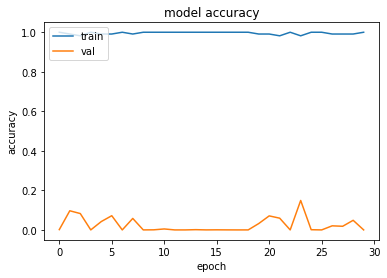

Epoch 1/30
3/3 [==============================] - 0s 93ms/step - loss: 0.1114 - accuracy: 0.9910 - val_loss: 9.1209 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 73ms/step - loss: 3.0616e-06 - accuracy: 1.0000 - val_loss: 9.4320 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 78ms/step - loss: 5.5657e-06 - accuracy: 1.0000 - val_loss: 9.7340 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 71ms/step - loss: 3.4367e-08 - accuracy: 1.0000 - val_loss: 10.0293 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 73ms/step - loss: 1.1888e-06 - accuracy: 1.0000 - val_loss: 10.3132 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 75ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 10.5922 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 72ms/step - loss: 0.2740 - accuracy: 0.9910 - val_loss: 10.8619 - val_accuracy: 0.5000
Epoch 8

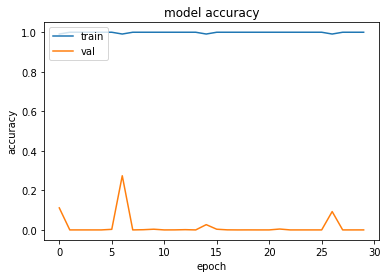

Epoch 1/30
3/3 [==============================] - 0s 93ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 17.6445 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 73ms/step - loss: 0.0738 - accuracy: 0.9910 - val_loss: 18.2212 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 71ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 18.8107 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 19.3890 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 70ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 19.9630 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 74ms/step - loss: 0.0361 - accuracy: 0.9910 - val_loss: 20.5412 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 75ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 21.0935 - val_accuracy: 0.5000
Epoch 8/30
3/3 [====

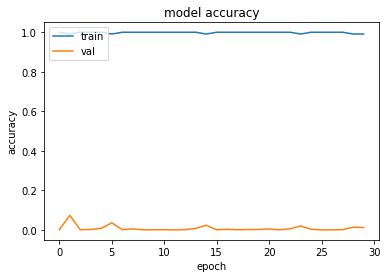

Epoch 1/30
3/3 [==============================] - 0s 94ms/step - loss: 0.0540 - accuracy: 0.9910 - val_loss: 6.8608 - val_accuracy: 0.4643
Epoch 2/30
3/3 [==============================] - 0s 75ms/step - loss: 2.6998e-04 - accuracy: 1.0000 - val_loss: 7.0866 - val_accuracy: 0.4643
Epoch 3/30
3/3 [==============================] - 0s 73ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 7.3003 - val_accuracy: 0.4643
Epoch 4/30
3/3 [==============================] - 0s 74ms/step - loss: 9.0637e-04 - accuracy: 1.0000 - val_loss: 7.4984 - val_accuracy: 0.4643
Epoch 5/30
3/3 [==============================] - 0s 74ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 7.6828 - val_accuracy: 0.4643
Epoch 6/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 7.8586 - val_accuracy: 0.4643
Epoch 7/30
3/3 [==============================] - 0s 71ms/step - loss: 0.0101 - accuracy: 0.9910 - val_loss: 7.9909 - val_accuracy: 0.4643
Epoch 8/30
3/3 [===

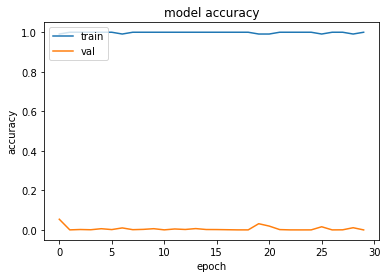

Epoch 1/30
3/3 [==============================] - 0s 94ms/step - loss: 0.0226 - accuracy: 0.9910 - val_loss: 9.3351 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0521 - accuracy: 0.9820 - val_loss: 9.6424 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 74ms/step - loss: 1.5143e-07 - accuracy: 1.0000 - val_loss: 9.9438 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 72ms/step - loss: 7.5398e-06 - accuracy: 1.0000 - val_loss: 10.2418 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0764 - accuracy: 0.9910 - val_loss: 10.5723 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 74ms/step - loss: 2.1317e-06 - accuracy: 1.0000 - val_loss: 10.8877 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 71ms/step - loss: 2.0758e-06 - accuracy: 1.0000 - val_loss: 11.1923 - val_accuracy: 0.5000
Epoch 8

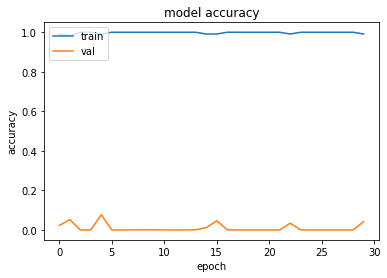

Epoch 1/30
3/3 [==============================] - 0s 91ms/step - loss: 1.2594e-04 - accuracy: 1.0000 - val_loss: 1.4064 - val_accuracy: 0.5357
Epoch 2/30
3/3 [==============================] - 0s 70ms/step - loss: 2.2701e-04 - accuracy: 1.0000 - val_loss: 1.5539 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 71ms/step - loss: 4.9590e-04 - accuracy: 1.0000 - val_loss: 1.6937 - val_accuracy: 0.5357
Epoch 4/30
3/3 [==============================] - 0s 71ms/step - loss: 0.0694 - accuracy: 0.9910 - val_loss: 1.8065 - val_accuracy: 0.5357
Epoch 5/30
3/3 [==============================] - 0s 71ms/step - loss: 0.0184 - accuracy: 0.9910 - val_loss: 1.8967 - val_accuracy: 0.5357
Epoch 6/30
3/3 [==============================] - 0s 71ms/step - loss: 1.2565e-06 - accuracy: 1.0000 - val_loss: 1.9703 - val_accuracy: 0.5357
Epoch 7/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.0361 - val_accuracy: 0.5357
Epoch 8/30


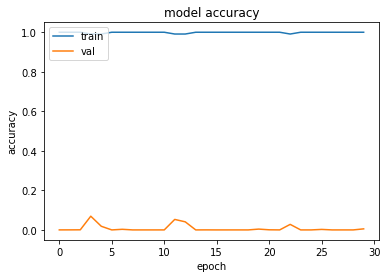

Epoch 1/30
3/3 [==============================] - 0s 92ms/step - loss: 2.6829e-04 - accuracy: 1.0000 - val_loss: 38.0116 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 71ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 39.2361 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 73ms/step - loss: 1.1977e-04 - accuracy: 1.0000 - val_loss: 40.4220 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 73ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 41.5608 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 76ms/step - loss: 0.0479 - accuracy: 0.9910 - val_loss: 42.8362 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 73ms/step - loss: 0.1296 - accuracy: 0.9820 - val_loss: 44.0507 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 45.2106 - val_accuracy: 0.5000
Epoch 8/30
3

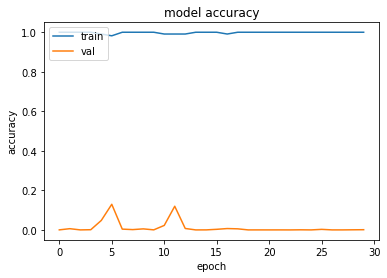

Epoch 1/30
3/3 [==============================] - 0s 96ms/step - loss: 3.2077e-04 - accuracy: 1.0000 - val_loss: 31.6838 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 73ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 31.9975 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 73ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 32.2904 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 75ms/step - loss: 3.2316e-04 - accuracy: 1.0000 - val_loss: 32.5613 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 74ms/step - loss: 3.5445e-04 - accuracy: 1.0000 - val_loss: 32.8267 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 71ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 33.0871 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 74ms/step - loss: 8.3219e-04 - accuracy: 1.0000 - val_loss: 33.3364 - val_accuracy: 0.5000
Epoc

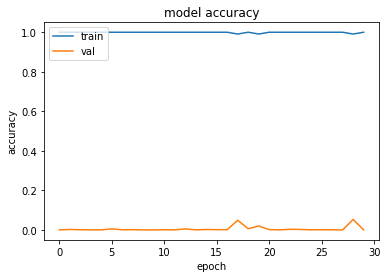

Epoch 1/30
3/3 [==============================] - 0s 93ms/step - loss: 4.3020e-06 - accuracy: 1.0000 - val_loss: 63.5957 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 63.9760 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0408 - accuracy: 0.9910 - val_loss: 64.2339 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 72ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 64.4767 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 71ms/step - loss: 0.0381 - accuracy: 0.9910 - val_loss: 64.7149 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 74ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 64.9430 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 73ms/step - loss: 4.5833e-04 - accuracy: 1.0000 - val_loss: 65.1520 - val_accuracy: 0.5000
Epoch 8/30
3

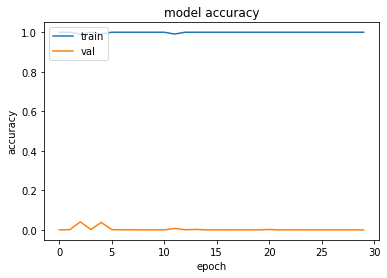

Epoch 1/30
3/3 [==============================] - 0s 90ms/step - loss: 7.7429e-07 - accuracy: 1.0000 - val_loss: 15.2858 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 73ms/step - loss: 1.1810e-04 - accuracy: 1.0000 - val_loss: 15.3547 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 72ms/step - loss: 8.4778e-04 - accuracy: 1.0000 - val_loss: 15.4031 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 71ms/step - loss: 4.2958e-09 - accuracy: 1.0000 - val_loss: 15.4421 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 74ms/step - loss: 1.6384e-05 - accuracy: 1.0000 - val_loss: 15.4688 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 75ms/step - loss: 0.0125 - accuracy: 0.9910 - val_loss: 15.4068 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 74ms/step - loss: 1.9822e-05 - accuracy: 1.0000 - val_loss: 15.3639 - val_accuracy: 0.5

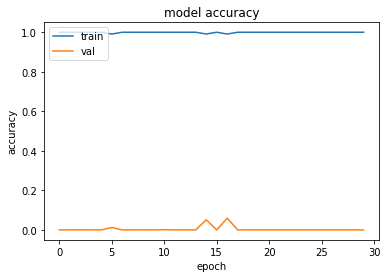

[0.0, 0.0001, 0.0125, 0.0, 0.0417, 0.0053, 0.0011, 0.0004, 0.0, 0.0]


In [ ]:
import numpy as np 
import random

no_of_generations = 2
no_of_individuals = 10
mutate_factor = 0.05
individuals = []

layers = [0,13]

def mutate(new_individual):

    for i in layers:
        for bias in range(len(new_individual.layers[i].get_weights()[1])):
            n = random.random()
            if(n < mutate_factor):
                new_individual.layers[i].get_weights()[1][bias] *= random.uniform(-0.5, 0.5)

    for i in layers:
        for weight in new_individual.layers[i].get_weights()[0]:
            n = random.random()
            if(n < mutate_factor):
                for j in range(len(weight)):
                    if(random.random() < mutate_factor):
                        new_individual.layers[i].get_weights()[0][j] *= random.uniform(-0.5, 0.5)


    return new_individual
    
                
                




def crossover(individuals):
    new_individuals = []

    new_individuals.append(individuals[0])
    new_individuals.append(individuals[1])

    for i in range(2, no_of_individuals):
        if(i < (no_of_individuals - 2)):
            if(i == 2):
                parentA = random.choice(individuals[:3])
                parentB = random.choice(individuals[:3])
            else:
                parentA = random.choice(individuals[:])
                parentB = random.choice(individuals[:])

            for i in layers:
                temp = parentA.layers[i].get_weights()[1]
                parentA.layers[i].get_weights()[1] = parentB.layers[i].get_weights()[1]
                parentB.layers[i].get_weights()[1] = temp

                new_individual = random.choice([parentA, parentB])
            
        else:
             new_individual = random.choice(individuals[:])

        new_individuals.append(mutate(new_individual))
        #new_individuals.append(new_individual)

    return new_individuals

        





def evolve(individuals, losses):
    sorted_y_idx_list = sorted(range(len(losses)),key=lambda x:losses[x])
    individuals = [individuals[i] for i in sorted_y_idx_list ]

    #winners = individuals[:6]

    new_individuals = crossover(individuals)

    return new_individuals




for i in range(no_of_individuals):
    individuals.append(init())

for generation in range(no_of_generations):
    individuals, losses = train(individuals)
    print(losses)

    individuals = evolve(individuals, losses)
individuals[0].save("cnn.h5", individuals[0])

Predicting the model with some random image from data

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
import cv2
import random
import numpy as np

model = load_model("cnn.h5")

In [ ]:
numberToTest = 67

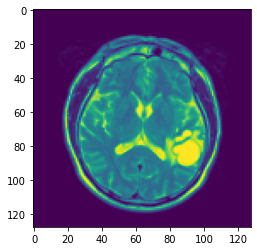

In [ ]:
pyplot.imshow(np.squeeze(x_train[numberToTest]))

In [ ]:
print("actual Answer")
print(np.argmax(y_train[numberToTest]))

actual Answer
0


In [ ]:
output = model.predict(x_train[numberToTest].reshape(1,128,128,1))

print("Model output :", output)
print("Value with highest probability :", np.argmax(output[0]))

Model output : [[0. 1.]]
Value with highest probability : 1


Check your own image

In [ ]:
def preprocess(path):
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    data = []
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
    data = np.array(data)
    data = np.array([np.dot(x[...,:3], rgb_weights) for x in data])
    data = data.reshape(data.shape[0],data.shape[1],data.shape[2],1)
    data = data.astype('float32')
    data /= 255
    return data

In [ ]:
pyplot.imshow(np.squeeze(preprocess("/content/test1.jpg")[0]))

FileNotFoundError: ignored

In [ ]:
pathToImage = "/content/test1.jpg"
output = model.predict(preprocess(pathToImage).reshape(1,128,128,1))

print("Model output :", output)
print("Value with highest probability :", np.argmax(output[0]))

Model output : [[1.0000000e+00 1.1100705e-30]]
Value with highest probability : 0
